In [46]:
import os
print(os.getcwd())
os.chdir(r'C:\Users\Sakshi T\Desktop\Project Final Year\Grading')
print(os.getcwd())
os.listdir()


C:\Users\Sakshi T\Desktop\Project Final Year\Grading
C:\Users\Sakshi T\Desktop\Project Final Year\Grading


['.ipynb_checkpoints',
 'Areca_h5_model.h5',
 'Areca_model.h5',
 'FINAL_PROJECT_OUTPUT.ipynb',
 'Grade1 and Grade2.ipynb',
 'Grading G1 and G2.ipynb',
 'Grading.rar',
 'input',
 'model1_grade1andgrade2_10epoch.h5',
 'Others',
 'output',
 'project 14-06-2022.ipynb',
 'Project 16-06-2022.ipynb',
 'test',
 'train',
 'validation']

In [47]:

# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns
import tqdm
from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [48]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [49]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [50]:
#Declaration of parameters needed for training and validation
train_data_dir =(r'C:\Users\Sakshi T\Desktop\Project Final Year\Grading\train')
test_data_dir =(r'C:\Users\Sakshi T\Desktop\Project Final Year\Grading\test')

In [51]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
import cv2
import os
import glob
import gc

def read_images(img_dir, xdim, ydim, nmax=5000) :
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1) # Reading the image in the directory
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB color conversion
            img = cv2.resize(img, (xdim,ydim)) # Resize image
            X.append(np.array(img)) # Convert to a table and add to the list of images
            y.append(label) # Adding the image label to the list of labels
            n=n+1
        print(n,' images read')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() # Memory recovery
    return X,y, label, label_names

In [53]:
def plot_roc_curve(y_pred,X_test,y_test) :
  
    probas = np.max(y_pred, axis=1)
    y_label = np.array([np.argmax(item) for item in y_test], dtype=np.bool_)
    y_label[y_label] = 1
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_label,probas)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')        # worst curve
    plt.plot([0,0,1],[0,1,1],'g:')     # best curve
    plt.xlim([-0.05,1.2])
    plt.ylim([-0.05,1.2])
    plt.ylabel('Rate of true positives')
    plt.xlabel('False positive rate')
    plt.show

In [54]:
X,y,Number_classes,Classes = read_images(r"C:\Users\Sakshi T\Desktop\Project Final Year\Grading\train", 224, 224, 1000)

Grade1
61  images read
Grade2
58  images read


In [55]:
Number_classes


2

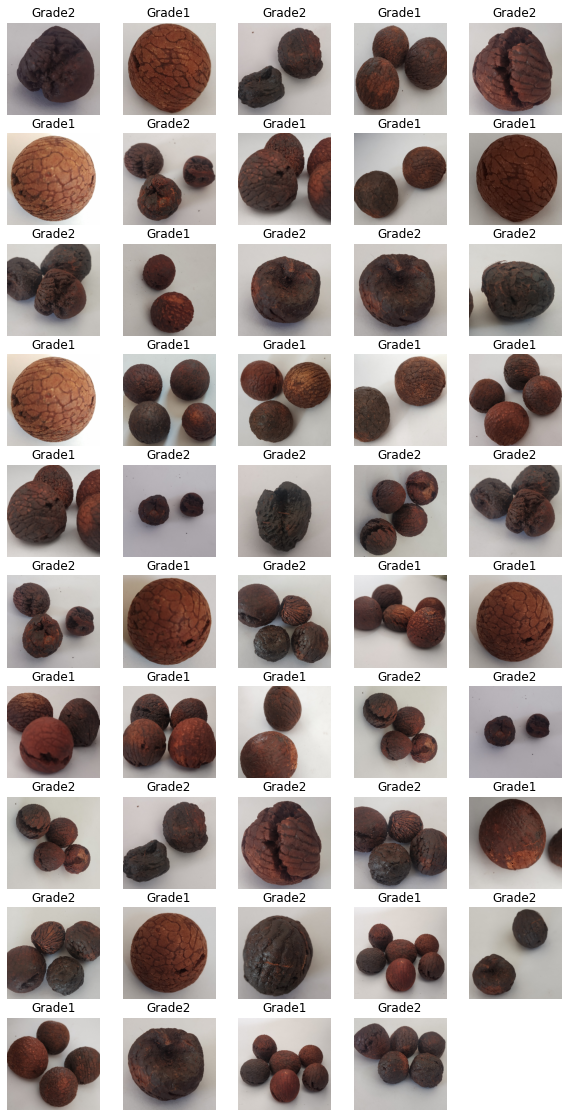

In [57]:
import random
plt.figure(figsize=(10,20))
for i in range(0,49):
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])

In [58]:
# Initialising the CNN
model = Sequential()

# 1st convolution and pooling payer
#Convolution Layer
model.add(Conv2D(32, 
                 (3, 3), 
                 activation = 'relu',
                 padding='same',
                 input_shape = (128, 128, 3)))
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))


# 2nd convolution and pooling payer
#Convolution Layer
model.add(Conv2D(32, 
                 (3, 3), 
                 padding='same',
                 activation = 'relu'))
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd convolution and pooling payer
#Convolution Layer
model.add(Conv2D(32, 
                 (3, 3), 
                 padding='same',
                 activation = 'relu'))
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))


#Flattening
model.add(Flatten())


# Fully Dense connection
model.add(Dense(64, 
                activation='relu'))


model.add(Dense(64, 
                activation='relu'))

model.add(Dense(64, 
                activation='relu'))


model.add(Dense(1, 
                activation='sigmoid'))


#Compile the model
adam= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)             

In [67]:
#Trainning Agementation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

#Test Agementation
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 138 images belonging to 3 classes.
Found 139 images belonging to 3 classes.


In [68]:
epochs = 20
model.fit_generator(training_set,
                    steps_per_epoch = 10,
                    epochs = epochs,
                    validation_data = test_set,
                    validation_steps = 2) 

Epoch 1/20
10/10 [==============================] - 83s 8s/step - loss: 1.3525 - acc: 0.5254 - val_loss: 0.1220 - val_acc: 0.4219
Epoch 2/20
10/10 [==============================] - 73s 7s/step - loss: -1.4559 - acc: 0.4203 - val_loss: -4.3611 - val_acc: 0.4219
Epoch 3/20
10/10 [==============================] - 67s 7s/step - loss: -68.2850 - acc: 0.4094 - val_loss: -138.4241 - val_acc: 0.4219
Epoch 4/20
10/10 [==============================] - 69s 7s/step - loss: -588.4132 - acc: 0.4493 - val_loss: -2004.7405 - val_acc: 0.4375
Epoch 5/20
10/10 [==============================] - 72s 7s/step - loss: -5526.7551 - acc: 0.3478 - val_loss: -11147.4531 - val_acc: 0.5625
Epoch 6/20
10/10 [==============================] - 70s 7s/step - loss: -29830.8767 - acc: 0.4964 - val_loss: -53562.7139 - val_acc: 0.3750
Epoch 7/20
10/10 [==============================] - 76s 8s/step - loss: -99770.3077 - acc: 0.4384 - val_loss: -180804.5469 - val_acc: 0.4531
Epoch 8/20
10/10 [============================

KeyboardInterrupt: 

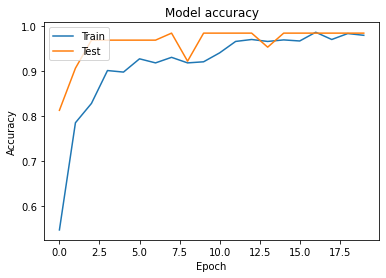

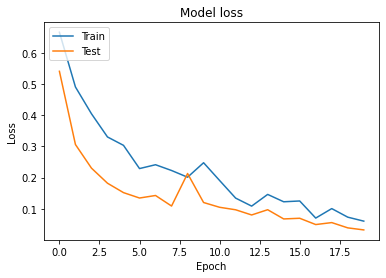

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.history
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Grade2


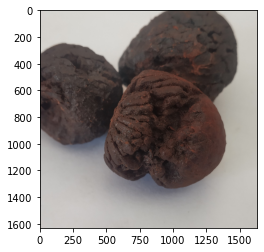

In [65]:
# Part 3 - Making new predictions

import numpy as np
from tensorflow.keras.preprocessing import image
IMG_DIR=r'C:\Users\Sakshi T\Desktop\Project Final Year\Grading\input\40.jpg'
test_image = image.load_img(IMG_DIR, 
                            target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Grade2'
    print(prediction)
else:
    prediction = 'Grade1'
    print(prediction)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(IMG_DIR)
imgplot = plt.imshow(img)
plt.show()

In [66]:
print('Train %',model.history.history['acc'][9] * 100)
print('Test %',model.history.history['val_acc'][9] * 100)

Train % 92.05297827720642
Test % 98.4375
